<a href="https://colab.research.google.com/github/Piyaphat23/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

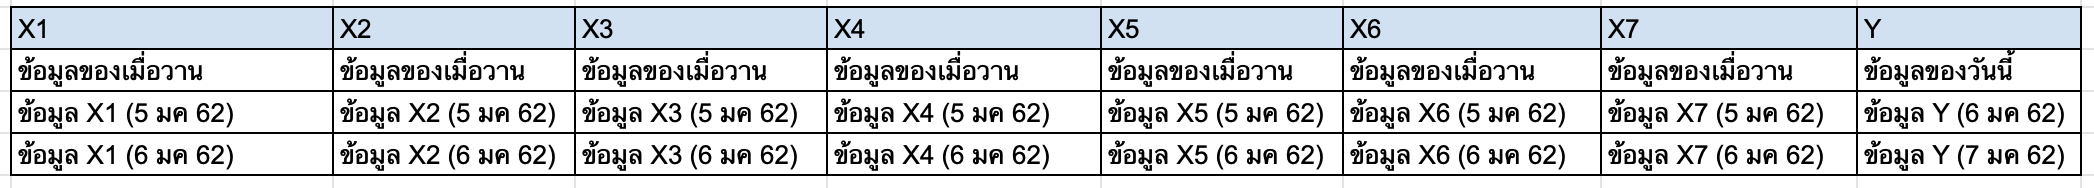

In [722]:
import pandas as pd

In [723]:
import numpy as np

##เชื่อมDrive

In [724]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##ข้อมูลความกดอากาศ 5 จังหวัด

In [725]:
atmos_KK =  pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
atmos_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [726]:
atmos_NP =  pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
atmos_SK =   pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
atmos_NK =  pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
atmos_Loei =  pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)

###เปลี่ยนชื่อColumn

In [727]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [728]:
atmos_KK = atmos_KK.rename(columns=column_name)
atmos_NP = atmos_NP.rename(columns=column_name)
atmos_SK = atmos_SK .rename(columns=column_name)
atmos_NK =atmos_NK .rename(columns=column_name)
atmos_Loei = atmos_Loei.rename(columns=column_name)


###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [729]:
atmos_KK  = atmos_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [730]:
atmos_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [731]:
atmos_NP  = atmos_NP.replace('-',np.NaN)

In [732]:
atmos_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [733]:
atmos_SK = atmos_SK.replace('-',np.NaN)

In [734]:
atmos_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [735]:
atmos_NK = atmos_NK.replace('-',np.NaN)

In [736]:
atmos_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [737]:
atmos_Loei= atmos_Loei.replace('-',np.NaN)

In [738]:
atmos_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

ขอนแก่น

In [739]:
for i in range(len(atmos_KK['ที่'])):atmos_KK.iloc[i,:]=atmos_KK.iloc[i,:].fillna(atmos_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [740]:
atmos_KK.isnull().any() #เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [741]:
atmos_KK.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667


นครพนม

In [742]:
for i in range(len(atmos_NP['ที่'])):atmos_NP.iloc[i,:]=atmos_NP.iloc[i,:].fillna(atmos_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [743]:
atmos_NP.isnull().any() #เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [744]:
atmos_NP.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.280000,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.60,1011.13,1011.717000,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.730000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.500000,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,1009.749667,1010.608000


สกลนคร

In [745]:
for i in range(len(atmos_SK['ที่'])):atmos_SK.iloc[i,:]=atmos_SK.iloc[i,:].fillna(atmos_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [746]:
atmos_SK.isnull().any() #เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [747]:
atmos_SK.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.210,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,1012.255,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.80,1016.96,1017.630,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.520,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,1010.554,1010.554000


หนองคาย

In [748]:
for i in range(len(atmos_NK['ที่'])):atmos_NK.iloc[i,:]=atmos_NK.iloc[i,:].fillna(atmos_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [749]:
atmos_NK.isnull().any() #เรียกดูค่า Missing อีกรอบK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [750]:
atmos_NK.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.180000,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.10,1012.332333,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.190000,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.380000,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.10,1010.214667,1010.214667


เลย

In [751]:
for i in range(len(atmos_Loei['ที่'])):atmos_Loei.iloc[i,:]=atmos_Loei.iloc[i,:].fillna(atmos_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [752]:
atmos_Loei.isnull().any() #เรียกดูค่า Missing อีกรอบK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [753]:
atmos_Loei.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.710000,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.10,1010.43,1012.078333,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.620000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.400000,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,1009.516667,1009.516667


##ข้อมูลความชื้นสัมพัทธ์ 5 จังหวัด

In [754]:
Hum_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
Hum_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
Hum_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
Hum_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
Hum_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [755]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [756]:
Hum_KK =Hum_KK.rename(columns=column_name)
Hum_NP = Hum_NP.rename(columns=column_name)
Hum_SK = Hum_SK .rename(columns=column_name)
Hum_NK =Hum_NK .rename(columns=column_name)
Hum_Loei = Hum_Loei.rename(columns=column_name)


###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [757]:
Hum_KK =Hum_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [758]:
Hum_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [759]:
Hum_NP = Hum_NP.replace('-',np.NaN)

In [760]:
Hum_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [761]:
Hum_SK = Hum_SK.replace('-',np.NaN)

In [762]:
Hum_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [763]:
Hum_NK = Hum_NK.replace('-',np.NaN)

In [764]:
Hum_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [765]:
Hum_Loei = Hum_Loei.replace('-',np.NaN)

In [766]:
Hum_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [767]:
for i in range(len(Hum_KK['ที่'])):Hum_KK.iloc[i,:]=Hum_KK.iloc[i,:].fillna(Hum_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [768]:
Hum_KK.isnull().any()#เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [769]:
for i in range(len(Hum_NP['ที่'])):Hum_NP.iloc[i,:]=Hum_NP.iloc[i,:].fillna(Hum_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [770]:
Hum_NP.isnull().any()#เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [771]:
for i in range(len(Hum_SK['ที่'])):Hum_SK.iloc[i,:]=Hum_SK.iloc[i,:].fillna(Hum_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [772]:
Hum_SK.isnull().any()#เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [773]:
for i in range(len(Hum_NK['ที่'])):Hum_NK.iloc[i,:]=Hum_NK.iloc[i,:].fillna(Hum_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [774]:
Hum_NK.isnull().any()#เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [775]:
for i in range(len(Hum_Loei['ที่'])):Hum_Loei.iloc[i,:]=Hum_Loei.iloc[i,:].fillna(Hum_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [776]:
Hum_Loei.isnull().any()#เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

##ข้อมูลความเร็วลม

In [777]:
Wind_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
Wind_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
Wind_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
Wind_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
Wind_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [778]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [779]:
Wind_KK =Wind_KK.rename(columns=column_name)
Wind_NP = Wind_NP.rename(columns=column_name)
Wind_SK  = Wind_SK .rename(columns=column_name)
Wind_NK =Wind_NK .rename(columns=column_name)
Wind_Loei =Wind_Loei.rename(columns=column_name)

###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [780]:
Wind_KK =Wind_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [781]:
Wind_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3              True
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [782]:
Wind_NP =Wind_NP.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [783]:
Wind_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5              True
6             False
7              True
8              True
9             False
10             True
11             True
12             True
13            False
14            False
15             True
16             True
17            False
18             True
19            False
20             True
21             True
22             True
23            False
24             True
25             True
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [784]:
Wind_SK =Wind_SK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [785]:
Wind_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20             True
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [786]:
Wind_NK =Wind_NK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [787]:
Wind_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [788]:
Wind_Loei =Wind_Loei.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [789]:
Wind_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5              True
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16             True
17            False
18            False
19             True
20            False
21            False
22            False
23            False
24             True
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [790]:
for i in range(len(Wind_KK['ที่'])):Wind_KK.iloc[i,:]=Wind_KK.iloc[i,:].fillna(Wind_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [791]:
Wind_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [792]:
for i in range(len(Wind_NP['ที่'])):Wind_NP.iloc[i,:]=Wind_NP.iloc[i,:].fillna(Wind_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [793]:
Wind_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [794]:
for i in range(len(Wind_SK['ที่'])):Wind_SK.iloc[i,:]=Wind_SK.iloc[i,:].fillna(Wind_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [795]:
Wind_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [796]:
for i in range(len(Wind_NK['ที่'])):Wind_NK.iloc[i,:]=Wind_NK.iloc[i,:].fillna(Wind_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [797]:
Wind_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [798]:
for i in range(len(Wind_Loei['ที่'])):Wind_Loei.iloc[i,:]=Wind_Loei.iloc[i,:].fillna(Wind_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [799]:
Wind_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

##ข้อมูลจำนวนเมฆ

In [800]:
Cloud_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
Cloud_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
Cloud_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
Cloud_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
Cloud_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [801]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [802]:
Cloud_KK =Cloud_KK.rename(columns=column_name)
Cloud_NP = Cloud_NP.rename(columns=column_name)
Cloud_SK  = Cloud_SK .rename(columns=column_name)
Cloud_NK =Cloud_NK .rename(columns=column_name)
Cloud_Loei =Cloud_Loei.rename(columns=column_name)

###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [803]:
Cloud_KK =Cloud_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [804]:
Cloud_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3              True
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [805]:
Cloud_NP =Cloud_NP.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [806]:
Cloud_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11            False
12            False
13             True
14             True
15             True
16            False
17            False
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26            False
27             True
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [807]:
Cloud_SK =Cloud_SK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [808]:
Cloud_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [809]:
Cloud_NK =Cloud_NK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [810]:
Cloud_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [811]:
Cloud_Loei =Cloud_Loei.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [812]:
Cloud_Loei.isnull().any()

ที่            False
สถานี          False
เดือนและปี     False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
ค่าเฉลี่ย      False
Unnamed: 35     True
Unnamed: 36     True
Unnamed: 37     True
Unnamed: 38     True
Unnamed: 39     True
Unnamed: 40     True
Unnamed: 41     True
Unnamed: 42     True
Unnamed: 43     True
Unnamed: 44     True
dtype: bool

ตัดตาราง Cloud_Loei ให้เหลือแค่ 35 column

In [813]:
Cloud_Loei = Cloud_Loei.iloc[:,:35]
Cloud_Loei

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.0,...,1.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.0,...,6.0,4.0,0.0,1.0,2.0,2.0,5.0,3.0,NaN,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.0,...,3.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.0,...,2.0,4.0,6.0,5.0,1.0,2.0,4.0,9.0,8.0,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,NaN,...,NaN,NaN,NaN,0.0,1.0,3.0,NaN,3.0,NaN,2.809524
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2.0,1.0,4.0,4.0,6.0,7.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,6.0,3.000000
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2.0,1.0,1.0,7.0,4.0,4.0,2.0,...,3.0,6.0,3.0,4.0,6.0,6.0,8.0,6.0,NaN,3.800000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3.0,3.0,6.0,6.0,3.0,6.0,4.0,...,6.0,2.0,6.0,8.0,4.0,2.0,1.0,4.0,2.0,3.032258
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2.0,2.0,2.0,1.0,2.0,4.0,1.0,...,1.0,2.0,4.0,3.0,8.0,10.0,7.0,5.0,9.0,3.333333
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,6.0,8.0,6.0,3.0,1.0,2.0,0.0,...,4.0,0.0,1.0,2.0,2.0,3.0,8.0,6.0,3.0,3.000000


###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [814]:
for i in range(len(Cloud_KK['ที่'])):Cloud_KK.iloc[i,:]=Cloud_KK.iloc[i,:].fillna(Cloud_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [815]:
Cloud_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [816]:
for i in range(len(Cloud_NP['ที่'])):Cloud_NP.iloc[i,:]=Cloud_NP.iloc[i,:].fillna(Cloud_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [817]:
Cloud_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [818]:
for i in range(len(Cloud_SK['ที่'])):Cloud_SK.iloc[i,:]=Cloud_SK.iloc[i,:].fillna(Cloud_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [819]:
Cloud_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [820]:
for i in range(len(Cloud_NK['ที่'])):Cloud_NK.iloc[i,:]=Cloud_NK.iloc[i,:].fillna(Cloud_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [821]:
Cloud_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [822]:
for i in range(len(Cloud_Loei['ที่'])):Cloud_Loei.iloc[i,:]=Cloud_Loei.iloc[i,:].fillna(Cloud_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง


In [823]:
Cloud_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

##ข้อมูลปริมาณน้ำฝน

In [824]:
Rain_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
Rain_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
Rain_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
Rain_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
Rain_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [825]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [826]:
Rain_KK =Rain_KK.rename(columns=column_name)
Rain_NP = Rain_NP.rename(columns=column_name)
Rain_SK  = Rain_SK .rename(columns=column_name)
Rain_NK =Rain_NK .rename(columns=column_name)
Rain_Loei =Rain_Loei.rename(columns=column_name)

###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [827]:
Rain_KK =Rain_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [828]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [829]:
Rain_NP =Rain_NP.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [830]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [831]:
Rain_SK =Rain_SK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [832]:
Rain_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [833]:
Rain_NK =Rain_NK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [834]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [835]:
Rain_Loei=Rain_Loei.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [836]:
Rain_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [837]:
for i in range(len(Rain_KK['ที่'])):Rain_KK.iloc[i,:]=Rain_KK.iloc[i,:].fillna(Rain_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [838]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [839]:
Rain_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0.0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,T,T


แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [840]:
Rain_KK = Rain_KK.replace('T',np.NaN)

In [841]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [842]:
Rain_KK.fillna(0.1, inplace=True)

In [843]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [844]:
Rain_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1


In [845]:
for i in range(len(Rain_NP['ที่'])):Rain_NP.iloc[i,:]=Rain_NP.iloc[i,:].fillna(Rain_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [846]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14            False
15             True
16             True
17             True
18             True
19            False
20             True
21            False
22             True
23             True
24            False
25             True
26            False
27            False
28            False
29            False
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [847]:
Rain_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0.0,0,0.0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0.0,0,0,T,T,0,...,0,0,0,0,0.5,0,0.0,0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,NaN
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0.0,0,0,0,0,0,...,2.3,0,0,0,0.0,0,0.0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,1.2,0,0.0,1.2,1.2,1.2


แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [848]:
Rain_NP = Rain_NP.replace('T',np.NaN)

In [849]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [850]:
Rain_NP.fillna(0.1, inplace=True)

In [851]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [852]:
Rain_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,1.2,1.2,1.2


In [853]:
for i in range(len(Rain_SK['ที่'])):Rain_SK.iloc[i,:]=Rain_SK.iloc[i,:].fillna(Rain_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [854]:
Rain_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [855]:
Rain_SK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,T,5.5,0.3,0,...,0.0,0,0.0,0,0,0,1.0,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0,T,T,2.8,...,0.0,0,0.0,0,0,0,0.0,0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0,0,0,0.0,0,0,NaN
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0,0,0,0,...,0.9,0,0.0,0,0,0,0.0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0.4,5.6,0,0.0,6,6,6


แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [856]:
Rain_SK = Rain_SK.replace('T',np.NaN)

In [857]:
Rain_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [858]:
Rain_SK.fillna(0.1, inplace=True)

In [859]:
Rain_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [860]:
Rain_SK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,6.0,6.0,6.0


In [861]:
for i in range(len(Rain_NK['ที่'])):Rain_NK.iloc[i,:]=Rain_NK.iloc[i,:].fillna(Rain_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [862]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [863]:
Rain_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.



In [864]:
Rain_NK = Rain_NK.replace('T',np.NaN)

In [865]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [866]:
Rain_NK.fillna(0.1, inplace=True)

In [867]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [868]:
Rain_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


In [869]:
for i in range(len(Rain_Loei['ที่'])):Rain_Loei.iloc[i,:]=Rain_Loei.iloc[i,:].fillna(Rain_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [870]:
Rain_Loei.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       ที่  สถานี  เดือนและปี      1      2      3      4      5      6      7  \
0   False  False       False  False  False  False  False  False  False  False   
1   False  False       False  False  False  False  False  False  False  False   
2   False  False       False  False  False  False  False  False  False  False   
3   False  False       False  False  False  False  False  False  False  False   
4   False  False       False  False  False  False  False  False  False  False   
5   False  False       False  False  False  False  False  False  False  False   
6   False  False       False  False  False  False  False  False  False  False   
7   False  False       False  False  False  False  False  False  False  False   
8   False  False       False  False  False  False  False  False  False  False   
9   False  False       False  False  False  False  False  False  False  False   
10  False  False       False  False  False  Fal

In [871]:
Rain_Loei.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0,3.4,1.8,...,0.0,0,0.0,0.0,0,0.2,0.0,0,0.0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.6,0.0,0,7.4,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,T,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,1,0.0,0.0,2.4,2.4,2.4


แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [872]:
Rain_Loei = Rain_Loei.replace('T',np.NaN)

In [873]:
Rain_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [874]:
Rain_Loei.fillna(0.1, inplace=True)

In [875]:
Rain_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [876]:
Rain_Loei.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,183.0
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,7.4,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.4,2.4,2.4


##ข้อมูลอุณหภูมิจุดน้ำค้าง

In [877]:

Dpt_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dpt_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dpt_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dpt_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dpt_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [878]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [879]:
Dpt_KK =Dpt_KK.rename(columns=column_name)
Dpt_NP = Dpt_NP.rename(columns=column_name)
Dpt_SK  = Dpt_SK .rename(columns=column_name)
Dpt_NK =Dpt_NK .rename(columns=column_name)
Dpt_Loei =Dpt_Loei.rename(columns=column_name)

###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [880]:
Dpt_KK =Dpt_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [881]:
Dpt_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [882]:
Dpt_NP =Dpt_NP.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [883]:
Dpt_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [884]:
Dpt_SK =Dpt_SK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [885]:
Dpt_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [886]:
Dpt_NK =Dpt_NK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [887]:
Dpt_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [888]:
Dpt_Loei =Dpt_Loei.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [889]:
Dpt_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [890]:
for i in range(len(Dpt_KK['ที่'])):Dpt_KK.iloc[i,:]=Dpt_KK.iloc[i,:].fillna(Dpt_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [891]:
Dpt_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [892]:
for i in range(len(Dpt_NP['ที่'])):Dpt_NP.iloc[i,:]=Dpt_NP.iloc[i,:].fillna(Dpt_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [893]:
Dpt_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [894]:
for i in range(len(Dpt_SK['ที่'])):Dpt_SK.iloc[i,:]=Dpt_SK.iloc[i,:].fillna(Dpt_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [895]:
Dpt_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [896]:
for i in range(len(Dpt_NK['ที่'])):Dpt_NK.iloc[i,:]=Dpt_NK.iloc[i,:].fillna(Dpt_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [897]:
Dpt_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [898]:
for i in range(len(Dpt_Loei['ที่'])):Dpt_Loei.iloc[i,:]=Dpt_Loei.iloc[i,:].fillna(Dpt_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [899]:
Dpt_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [900]:
Dpt_Loei

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21.000000,20.200000,20.200000,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.500000,19.400000,18.953333,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.200000,16.200000,16.500000,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.200000,18.200000,17.400000,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.900000,17.310345,17.310345,17.310345
5,3,353201-เลย จ.เลย,2012-10-01,22.1,21.9,22.4,23.1,23.4,23.2,22.2,...,20.7,20.6,21.0,21.1,21.3,20.8,21.800000,21.700000,20.200000,21.770968
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.800000,26.700000,26.736667,26.736667
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.600000,24.400000,20.300000,24.538710
8,6,353201-เลย จ.เลย,2013-01-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,...,16.6,18.3,18.4,18.7,19.4,18.0,18.400000,18.000000,19.200000,16.041935
9,7,353201-เลย จ.เลย,2013-02-01,18.2,19.0,18.2,17.9,17.9,19.0,17.5,...,13.6,13.9,16.8,18.3,18.6,20.1,17.600000,17.600000,17.600000,17.600000


แก้ไขกรณีจังหวัดเลยมี column ไม่ครบ

In [901]:
A=Dpt_Loei.iloc[:,3:35].mean().tolist()

In [902]:
R1=Rain_Loei.iloc[50:,:3]

In [903]:
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [904]:
for i in range(32):
  R1[L[i]] = A[i]

In [905]:
R1.rename(columns={32:'ค่าเฉลี่ย'},inplace=True)

In [906]:
R1

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,353201-เลย จ.เลย,2021-10-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.031286,17.876458,17.671391,18.343843
51,49,353201-เลย จ.เลย,2021-11-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.031286,17.876458,17.671391,18.343843
52,50,353201-เลย จ.เลย,2021-12-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.031286,17.876458,17.671391,18.343843
53,1,353201-เลย จ.เลย,2022-01-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.031286,17.876458,17.671391,18.343843
54,2,353201-เลย จ.เลย,2022-02-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.031286,17.876458,17.671391,18.343843


In [965]:
Dpt_Loei=pd.concat([Dpt_Loei,R1])

##ข้อมูลอุณหภูมิต่ำสุด

In [907]:

Low_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Low_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Low_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
Low_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Low_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [908]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [909]:
Low_KK =Low_KK.rename(columns=column_name)
Low_NP = Low_NP.rename(columns=column_name)
Low_SK  = Low_SK .rename(columns=column_name)
Low_NK =Low_NK .rename(columns=column_name)
Low_Loei =Low_Loei.rename(columns=column_name)

###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [910]:
Low_KK =Low_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [911]:
Low_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25            False
26            False
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [912]:
Low_NP =Low_NP.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [913]:
Low_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5              True
6             False
7             False
8             False
9             False
10            False
11             True
12            False
13            False
14            False
15            False
16             True
17             True
18             True
19             True
20            False
21             True
22             True
23             True
24            False
25             True
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [914]:
Low_SK =Low_SK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [915]:
Low_SK.isnull().any()

ที่            True
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [916]:
Low_NK =Low_NK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [917]:
Low_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [918]:
Low_Loei =Low_Loei.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [919]:
Low_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12             True
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [920]:
for i in range(len(Low_KK['ที่'])):Low_KK.iloc[i,:]=Low_KK.iloc[i,:].fillna(Low_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [921]:
Low_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [922]:
for i in range(len(Low_NP['ที่'])):Low_NP.iloc[i,:]=Low_NP.iloc[i,:].fillna(Low_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [923]:
Low_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [924]:
for i in range(len(Low_SK['ที่'])):Low_SK.iloc[i,:]=Low_SK.iloc[i,:].fillna(Low_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [925]:
Low_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [926]:
for i in range(len(Low_NK['ที่'])):Low_NK.iloc[i,:]=Low_NK.iloc[i,:].fillna(Low_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [927]:
Low_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [928]:
for i in range(len(Low_Loei['ที่'])):Low_Loei.iloc[i,:]=Low_Loei.iloc[i,:].fillna(Low_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [929]:
Low_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

##ข้อมูลอุณหภูมิแห้ง

In [930]:
Dry_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dry_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dry_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dry_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dry_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [931]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [932]:
Dry_KK =Dry_KK.rename(columns=column_name)
Dry_NP = Dry_NP.rename(columns=column_name)
Dry_SK  = Dry_SK .rename(columns=column_name)
Dry_NK =Dry_NK .rename(columns=column_name)
Dry_Loei =Dry_Loei.rename(columns=column_name)

###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [933]:
Dry_KK =Dry_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [934]:
Dry_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [935]:
Dry_NP =Dry_NP.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [936]:
Dry_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [937]:
Dry_SK =Dry_SK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [938]:
Dry_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [939]:
Dry_NK =Dry_NK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [940]:
Dry_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [941]:
Dry_Loei =Dry_Loei.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [942]:
Dry_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [943]:
for i in range(len(Dry_KK['ที่'])):Dry_KK.iloc[i,:]=Dry_KK.iloc[i,:].fillna(Dry_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [944]:
Dry_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [945]:
for i in range(len(Dry_NP['ที่'])):Dry_NP.iloc[i,:]=Dry_NP.iloc[i,:].fillna(Dry_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [946]:
Dry_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [947]:
for i in range(len(Dry_SK['ที่'])):Dry_SK.iloc[i,:]=Dry_SK.iloc[i,:].fillna(Dry_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [948]:
Dry_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [949]:
for i in range(len(Dry_NK['ที่'])):Dry_NK.iloc[i,:]=Dry_NK.iloc[i,:].fillna(Dry_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [950]:
Dry_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [951]:
for i in range(len(Dry_Loei['ที่'])):Dry_Loei.iloc[i,:]=Dry_Loei.iloc[i,:].fillna(Dry_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [952]:
Dry_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [953]:
Dry_Loei.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,24.4,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,25.4,25.4,25.4


แก้ไขกรณีจังหวัดเลยมี column ไม่ครบ

In [954]:
B=Dry_Loei.iloc[:,3:35].mean().tolist()

In [955]:
R2=Rain_Loei.iloc[50:,:3]

In [956]:
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [957]:
for i in range(32):
  R2[L[i]] = B[i]

In [958]:
R2.rename(columns={32:'ค่าเฉลี่ย'},inplace=True)

In [959]:
R2

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,353201-เลย จ.เลย,2021-10-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
51,49,353201-เลย จ.เลย,2021-11-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
52,50,353201-เลย จ.เลย,2021-12-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
53,1,353201-เลย จ.เลย,2022-01-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
54,2,353201-เลย จ.เลย,2022-02-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246


In [960]:
Dry_Loei=pd.concat([Dry_Loei,R2])

##รวมตารางเข้าด้วยกัน

###เพิ่ม Column จังหวัด

In [961]:
#1.ความกดอากาศ (atmos)
atmos_KK['จังหวัด']='ขอนเเก่น'
atmos_NP['จังหวัด']='นครพนม'
atmos_SK['จังหวัด']='สกล'
atmos_NK['จังหวัด']='หนองคาย'
atmos_Loei['จังหวัด']='เลย'
#2.ความชื้นสัมพัทธ์ (Hum)
Hum_KK['จังหวัด']='ขอนเเก่น'
Hum_NP['จังหวัด']='นครพนม'
Hum_SK['จังหวัด']='สกล'
Hum_NK['จังหวัด']='หนองคาย'
Hum_Loei['จังหวัด']='เลย'
#3.ความเร็วลม (Wind)
Wind_KK['จังหวัด']='ขอนเเก่น'
Wind_NP['จังหวัด']='นครพนม'
Wind_SK['จังหวัด']='สกล'
Wind_NK['จังหวัด']='หนองคาย'
Wind_Loei['จังหวัด']='เลย'
#4.จำนวนเมฆ (Cloud)
Cloud_KK['จังหวัด']='ขอนเเก่น'
Cloud_NP['จังหวัด']='นครพนม'
Cloud_SK['จังหวัด']='สกล'
Cloud_NK['จังหวัด']='หนองคาย'
Cloud_Loei['จังหวัด']='เลย'
#5.ปริมาณฝน (Rain)
Rain_KK['จังหวัด']='ขอนเเก่น'
Rain_NP['จังหวัด']='นครพนม'
Rain_SK['จังหวัด']='สกล'
Rain_NK['จังหวัด']='หนองคาย'
Rain_Loei['จังหวัด']='เลย'
#6.อุณหภูมิจุดน้ำค้าง (Dpt)
Dpt_KK['จังหวัด']='ขอนเเก่น'
Dpt_NP['จังหวัด']='นครพนม'
Dpt_SK['จังหวัด']='สกล'
Dpt_NK['จังหวัด']='หนองคาย'
Dpt_Loei['จังหวัด']='เลย'
#7.อุณหภูมิต่ำสุด (Low)
Low_KK['จังหวัด']='ขอนเเก่น'
Low_NP['จังหวัด']='นครพนม'
Low_SK['จังหวัด']='สกล'
Low_NK['จังหวัด']='หนองคาย'
Low_Loei['จังหวัด']='เลย'
#8.อุณหภูมิตุ้มแห้ง (Dry)
Dry_KK['จังหวัด']='ขอนเเก่น'
Dry_NP['จังหวัด']='นครพนม'
Dry_SK['จังหวัด']='สกล'
Dry_NK['จังหวัด']='หนองคาย'
Dry_Loei['จังหวัด']='เลย'

In [962]:
#สร้าง list year and mon เพื่อวนลูปเอาเดือนและปีใส่เข้าไป
year=[]
mon=[]
for i in range(len(Dry_KK['เดือนและปี'])) :
  L = str(Dry_KK['เดือนและปี'][i]).split(' ')[0].split('-')[0]
  T = str(Dry_KK['เดือนและปี'][i]).split(' ')[0].split('-')[1]
  year.append(L)
  mon.append(T)

In [966]:
#แยกเดือนและปีไปอีก column หนึ่ง
#1.ความกดอากาศ (atmos)
atmos_KK['ปี']=year
atmos_KK['เดือน']=mon
atmos_NP['ปี']=year
atmos_NP['เดือน']=mon
atmos_SK['ปี']=year
atmos_SK['เดือน']=mon
atmos_NK['ปี']=year
atmos_NK['เดือน']=mon
atmos_Loei['ปี']=year
atmos_Loei['เดือน']=mon
#2.ความชื้นสัมพัทธ์ (Hum)
Hum_KK['ปี']=year
Hum_KK['เดือน']=mon
Hum_NP['ปี']=year
Hum_NP['เดือน']=mon
Hum_SK['ปี']=year
Hum_SK['เดือน']=mon
Hum_NK['ปี']=year
Hum_NK['เดือน']=mon
Hum_Loei['ปี']=year
Hum_Loei['เดือน']=mon
#3.ความเร็วลม (Wind)
Wind_KK['ปี']=year
Wind_KK['เดือน']=mon
Wind_NP['ปี']=year
Wind_NP['เดือน']=mon
Wind_SK['ปี']=year
Wind_SK['เดือน']=mon
Wind_NK['ปี']=year
Wind_NK['เดือน']=mon
Wind_Loei['ปี']=year
Wind_Loei['เดือน']=mon
#4.จำนวนเมฆ (Cloud)
Cloud_KK['ปี']=year
Cloud_KK['เดือน']=mon
Cloud_NP['ปี']=year
Cloud_NP['เดือน']=mon
Cloud_SK['ปี']=year
Cloud_SK['เดือน']=mon
Cloud_NK['ปี']=year
Cloud_NK['เดือน']=mon
Cloud_Loei['ปี']=year
Cloud_Loei['เดือน']=mon
#5.ปริมาณฝน (Rain)
Rain_KK['ปี']=year
Rain_KK['เดือน']=mon
Rain_NP['ปี']=year
Rain_NP['เดือน']=mon
Rain_SK['ปี']=year
Rain_SK['เดือน']=mon
Rain_NK['ปี']=year
Rain_NK['เดือน']=mon
Rain_Loei['ปี']=year
Rain_Loei['เดือน']=mon
#6.อุณหภูมิจุดน้ำค้าง (Dpt)
Dpt_KK['ปี']=year
Dpt_KK['เดือน']=mon
Dpt_NP['ปี']=year
Dpt_NP['เดือน']=mon
Dpt_SK['ปี']=year
Dpt_SK['เดือน']=mon
Dpt_NK['ปี']=year
Dpt_NK['เดือน']=mon
Dpt_Loei['ปี']=year
Dpt_Loei['เดือน']=mon
#7.อุณหภูมิต่ำสุด (Low)
Low_KK['ปี']=year
Low_KK['เดือน']=mon
Low_NP['ปี']=year
Low_NP['เดือน']=mon
Low_SK['ปี']=year
Low_SK['เดือน']=mon
Low_NK['ปี']=year
Low_NK['เดือน']=mon
Low_Loei['ปี']=year
Low_Loei['เดือน']=mon
#8.อุณหภูมิตุ้มแห้ง (Dry)
Dry_KK['ปี']=year
Dry_KK['เดือน']=mon
Dry_NP['ปี']=year
Dry_NP['เดือน']=mon
Dry_SK['ปี']=year
Dry_SK['เดือน']=mon
Dry_NK['ปี']=year
Dry_NK['เดือน']=mon
Dry_Loei['ปี']=year
Dry_Loei['เดือน']=mon

In [968]:
Rain_Loei.head() #ลองเรียกออกมาดู 1 ตาราง

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,26,27,28,29,30,31,ค่าเฉลี่ย,จังหวัด,ปี,เดือน
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.2,0.0,0.0,0.0,183.0,เลย,2011,10
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.6,0.0,0.0,7.4,7.4,เลย,2011,11
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,เลย,2011,12
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,18.2,เลย,2012,01
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.4,2.4,2.4,เลย,2012,02


###เปลี่ยนรูปแบบตาราง

In [ ]:
#1.ความกดอากาศ (AtP)
atmos_KK_H = atmos_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
atmos_NP_H =atmos_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
atmos_SK_H = atmos_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
atmos_NK_H =atmos_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
atmos_Loei_H = atmos_Loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
#2.ความชื้นสัมพัทธ์ (Hum)
Hum_KK_H = Hum_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
Hum_NP_H =Hum_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
Hum_SK_H = Hum_SK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
Hum_NK_H =Hum_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
Hum_Loei_H = Hum_Loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
#3.ความเร็วลม (Wind)
Wind_KK_H = Wind_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_NP_H = Wind_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_SK_H = Wind_SK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_NK_H = Wind_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_Loei_H = Wind_Loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
#4.จำนวนเมฆ (Cloud)
Cloud_KK_H = Cloud_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Cloud_NP_H = Cloud_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Cloud_SN_H = Cloud_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Cloud_NK_H = Cloud_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Cloud_L_H = Cloud_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
#5.ปริมาณน้ำฝน (Rain)
Rain_KK_H = Rain_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rain_NP_H = Rain_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rain_SN_H = Rain_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rain_NK_H = Rain_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rain_L_H = Rain_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
#6.อุณหภูมิจุดน้ำค้าง (DewT)
DewT_KK_H = DewT_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
DewT_NP_H = DewT_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
DewT_SN_H = DewT_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
DewT_NK_H = DewT_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
DewT_L_H = DewT_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
#7.อุณหภูมิต่ำสุด (LowT)
LowT_KK_H = LowT_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
LowT_NP_H = LowT_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
LowT_SN_H = LowT_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
LowT_NK_H = LowT_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
LowT_L_H = LowT_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
#8.อุณหภูมิตุ้มเเห้ง (DBT)
DBT_KK_H = DBT_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
DBT_NP_H = DBT_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
DBT_SN_H = DBT_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
DBT_NK_H = DBT_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
DBT_L_H = DBT_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().ren